In [1]:
from placeholder import MultiLogicalSurfaceCode
import numpy as np

# Initialize with distance 3 and 2 logical qubits
distance = 3
num_logical_qubits = 2
mlsc = MultiLogicalSurfaceCode(distance=distance, num_logical_qubits=num_logical_qubits)


Logical Qubit 0:
  Data Indices: [1, 2, 3, 7, 8, 9, 13, 14, 15]
  X Stabilisers Indices: [(0.5, 0.5), (1.5, 1.5), (1.5, -0.5), (0.5, 2.5)]
  Z Stabilisers Indices: [(1.5, 0.5), (0.5, 1.5), (-0.5, 0.5), (2.5, 1.5)]

  Number of Stabilisers: 8
Logical Qubit 1:
  Data Indices: [18, 19, 20, 24, 25, 26, 30, 31, 32]
  X Stabilisers Indices: [(4.5, 0.5), (5.5, 1.5), (5.5, -0.5), (4.5, 2.5)]
  Z Stabilisers Indices: [(5.5, 0.5), (4.5, 1.5), (3.5, 0.5), (6.5, 1.5)]

  Number of Stabilisers: 8
16


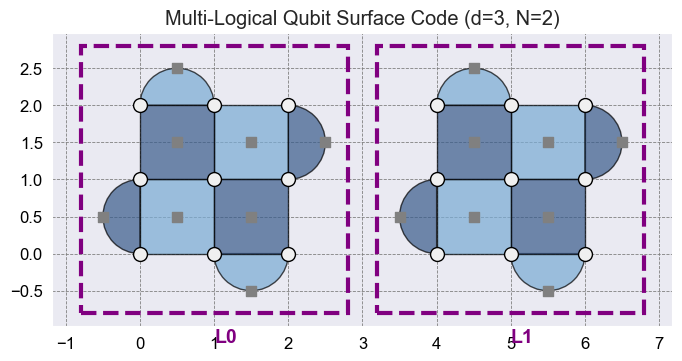

In [2]:
i = 0
for key, lq_info in mlsc.logical_qubits.items():
    print(f"Logical Qubit {key}:")
    print(f"  Data Indices: {lq_info['data_indices']}")
    print(f"  X Stabilisers Indices: {lq_info['x_stabilisers_coords']}")
    print(f"  Z Stabilisers Indices: {lq_info['z_stabilisers_coords']}")
    print()
    # number of stabilisers
    num_stabilisers = len(lq_info['x_stabilisers_coords']) + len(lq_info['z_stabilisers_coords'])
    print(f"  Number of Stabilisers: {num_stabilisers}")
    i += num_stabilisers
print(i)
res = np.array([False]*(distance**2) * num_logical_qubits)

mlsc.visualize_results(result=res, show_ancillas=True)

In [3]:
noise = {"p_meas": 0.0}
mlsc.apply_logical_gate(gate="CNOT", control=0, target=1, noise_params={"p_gate2": 0.0})
mlsc.build_in_stim_noisy(rounds=distance, noise_params=noise, logical_basis=["X", "Z"])

In [5]:
mlsc.diagram()

      /------------------------\ /-----------------------------------------------------------------------------------------------------------------------\ /---------------------------------------------------------------------------------------------------------------------------------------\ /----------------------------------------------------------------------------------------------------------------------------------------------------------------\ /-------------------------------------------------------------------------------------------------------------------------------------\
 q0: -QUBIT_COORDS(1.5,-0.5)-----R-----------------H-@-@-H-----------------------------------------------------------------------------M:rec[2]------------------------------R---------------H-@-@-H-----------------------------------------------------------------------------M:rec[18]-----------DETECTOR(1.5,-0.5,2):D2=rec[2]*rec[18]---R-----------------H-@-@-H-------------------------------------------------

In [4]:
# mlsc.diagram()
mlsc.run_with_pymatching(shots=1000)

ValueError: The circuit contains non-deterministic detectors.

To make an SVG picture of the problem, you can use the python API like this:
    your_circuit.diagram('detslice-with-ops-svg', tick=range(0, 5), filter_coords=['D3', ])
or the command line API like this:
    stim diagram --in your_circuit_file.stim --type detslice-with-ops-svg --tick 0:5 --filter_coords D3 > output_image.svg

This was discovered while analyzing a Z-basis reset (R) on:
    qubit 32 [coords (6, 2)]

The collapse anti-commuted with these detectors/observables:
    D3 [coords (1.5, 1.5, 2)]

The backward-propagating error sensitivity for D3 was:
    X25 [coords (5, 1)]
    X26 [coords (6, 1)]
    X31 [coords (5, 2)]
    X32 [coords (6, 2)]

Circuit stack trace:
    during TICK layer #1 of 5
    at instruction #35 [which is R 1 2 3 7 8 9 13 14 15 18 19 20 24 25 26 30 31 32]

In [ ]:
# res = mlsc.run_with_pymatching(shots=10)
result = mlsc.run_simulation(shots=10)
result

array([[False, False,  True, False, False, False, False, False, False,
        False, False, False,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False,  True, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False,  True,  True, False, False, False, False, False, False,
        False, False, False,  True,  True, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False,  True, False, False, False, False, False, False, False,
        False, False, False,  True,  True,  True,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, F

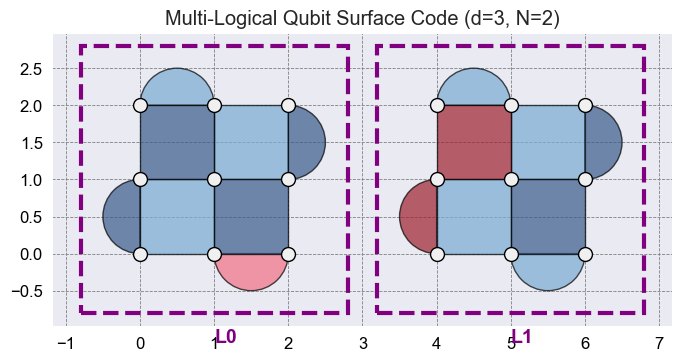

In [ ]:
mlsc.visualize_results(result=result[0])